<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/sjchoi86/upstage-basic-deeplearning/blob/main/notebook/mlp.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/sjchoi86/upstage-basic-deeplearning/blob/main/notebook/mlp.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View Source</a>
  </td>
</table>

# Multilayer Perceptron (MLP)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
%matplotlib inline
%config InlineBackend.figure_format='retina' # matplotlib 화질 좋게 해줌
print ("PyTorch version:[%s]."%(torch.__version__))
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print ("device:[%s]."%(device))

PyTorch version:[1.7.0+cu101].
device:[cuda:0].


### Dataset

In [ ]:
from torchvision import datasets,transforms
mnist_train = datasets.MNIST(root='./data/',train=True,transform=transforms.ToTensor(),download=True)
mnist_test = datasets.MNIST(root='./data/',train=False,transform=transforms.ToTensor(),download=True)
print ("mnist_train:\n",mnist_train,"\n")
print ("mnist_test:\n",mnist_test,"\n")
print ("Done.")

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...




Done!
mnist_train:
 Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data/
    Split: Train
    StandardTransform
Transform: ToTensor() 

mnist_test:
 Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data/
    Split: Test
    StandardTransform
Transform: ToTensor() 

Done.


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### Data Iterator

In [ ]:
BATCH_SIZE = 256
train_iter = torch.utils.data.DataLoader(mnist_train,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
# shuffle = True 하지않으면 신경망이 순서를 학습해버림
test_iter = torch.utils.data.DataLoader(mnist_test,batch_size=BATCH_SIZE,shuffle=True,num_workers=1)
print ("Done.")

Done.


### Define the MLP model

In [ ]:
class MultiLayerPerceptronClass(nn.Module): # nn.Module 상속
    """
        Multilayer Perceptron (MLP) Class
    """
    def __init__(self,name='mlp',xdim=784,hdim=256,ydim=10):
        super(MultiLayerPerceptronClass,self).__init__()
        self.name = name
        self.xdim = xdim
        self.hdim = hdim
        self.ydim = ydim
        self.lin_1 = nn.Linear(
            # FILL IN HERE
            self.xdim,
            self.hdim
        )
        self.lin_2 = nn.Linear(
            # FILL IN HERE
            self.hdim,
            self.ydim
        )
        self.init_param() # initialize parameters
        
    def init_param(self): # custom initializer 
        nn.init.kaiming_normal_(self.lin_1.weight)
        nn.init.zeros_(self.lin_1.bias)
        nn.init.kaiming_normal_(self.lin_2.weight)
        nn.init.zeros_(self.lin_2.bias)

    def forward(self,x):
        net = x
        net = self.lin_1(net)
        net = F.relu(net)
        net = self.lin_2(net) # 마지막은 activation 필요없음
        return net

M = MultiLayerPerceptronClass(name='mlp',xdim=784,hdim=256,ydim=10).to(device) # 해당 정보를to(cpu나 gpu)로 넘겨줌
loss = nn.CrossEntropyLoss()
optm = optim.Adam(M.parameters(),lr=1e-3) # optimizer 선택
print ("Done.")

Done.


### Simple Forward Path of the MLP Model

In [ ]:
x_numpy = np.random.rand(2,784)
x_torch = torch.from_numpy(x_numpy).float().to(device)
y_torch = M.forward(x_torch) # forward path, forward를 안써도 자동으로 불러오긴 하지만 명시적으로 표시 M(x_torch)도 가능
y_numpy = y_torch.detach().cpu().numpy() # torch tensor to numpy array
print ("x_numpy:\n",x_numpy)
print ("x_torch:\n",x_torch)
print ("y_torch:\n",y_torch)
print ("y_numpy:\n",y_numpy)

x_numpy:
 [[0.22398864 0.00260635 0.50288663 ... 0.5504344  0.07723906 0.92288592]
 [0.08804214 0.03784869 0.26687159 ... 0.67774375 0.85805943 0.09741783]]
x_torch:
 tensor([[0.2240, 0.0026, 0.5029,  ..., 0.5504, 0.0772, 0.9229],
        [0.0880, 0.0378, 0.2669,  ..., 0.6777, 0.8581, 0.0974]],
       device='cuda:0')
y_torch:
 tensor([[-0.2003, -0.9790,  0.8726, -1.1204,  0.8021, -1.4442,  0.7366, -0.2570,
          0.1521, -0.0876],
        [-0.2089, -0.3571,  0.6718, -1.5616,  0.5208, -0.7029,  0.4420, -1.0878,
         -0.4057,  0.5512]], device='cuda:0', grad_fn=<AddmmBackward>)
y_numpy:
 [[-0.20032227 -0.9789932   0.87255615 -1.1204058   0.80210125 -1.4442089
   0.73660696 -0.25695413  0.15207204 -0.08757065]
 [-0.20889668 -0.35714778  0.67184687 -1.5615942   0.5207823  -0.7028986
   0.4420168  -1.0878234  -0.40566495  0.55116105]]


### Check Parameters

In [ ]:
np.set_printoptions(precision=3)
n_param = 0
for p_idx,(param_name,param) in enumerate(M.named_parameters()): # get parameter from M
    param_numpy = param.detach().cpu().numpy()
    n_param += len(param_numpy.reshape(-1))
    print ("[%d] name:[%s] shape:[%s]."%(p_idx,param_name,param_numpy.shape))
    print ("    val:%s"%(param_numpy.reshape(-1)[:5]))
print ("Total number of parameters:[%s]."%(format(n_param,',d'))) 

[0] name:[lin_1.weight] shape:[(256, 784)].
    val:[ 0.003 -0.01  -0.026 -0.019 -0.002]
[1] name:[lin_1.bias] shape:[(256,)].
    val:[0. 0. 0. 0. 0.]
[2] name:[lin_2.weight] shape:[(10, 256)].
    val:[-0.042  0.207  0.078 -0.031 -0.013]
[3] name:[lin_2.bias] shape:[(10,)].
    val:[0. 0. 0. 0. 0.]
Total number of parameters:[203,530].


### Evaluation Function

In [ ]:
def func_eval(model,data_iter,device):
    with torch.no_grad(): # gradient 계산 안함
        model.eval() # evaluate (affects DropOut and BN), 학습 또는 테스트 때 바꿔야할 경우
        n_total,n_correct = 0,0
        for batch_in,batch_out in data_iter:
            y_trgt = batch_out.to(device)
            model_pred = model(
                # FILL IN HERE
                batch_in.view(-1,28*28).to(device) # reshape 이후 삽입
            )
            _,y_pred = torch.max(model_pred.data,1)
            n_correct += (
                # FILL IN HERE
                y_pred==y_trgt
            ).sum().item()
            n_total += batch_in.size(0)
        val_accr = (n_correct/n_total) # 정확도 구하기
        model.train() # back to train mode 
    return val_accr
print ("Done")

Done


### Initial Evaluation

In [ ]:
M.init_param() # initialize parameters
train_accr = func_eval(M,train_iter,device)
test_accr = func_eval(M,test_iter,device) 
print ("train_accr:[%.3f] test_accr:[%.3f]."%(train_accr,test_accr)) # 처음에는 랜덤하게 돌리므로 10%

train_accr:[0.107] test_accr:[0.112].


### Train

In [ ]:
print ("Start training.")
M.init_param() # initialize parameters, 모델 초기화, 실제로는 랜덤 seed fix가 잇어야함
M.train()
EPOCHS,print_every = 10,1
for epoch in range(EPOCHS):
    loss_val_sum = 0
    for batch_in,batch_out in train_iter:
        # Forward path
        y_pred = M.forward(batch_in.view(-1, 28*28).to(device))
        loss_out = loss(y_pred,batch_out.to(device))
        # Update
        # FILL IN HERE     
        optm.zero_grad() # 각각 parameter의 reset gradient 
        # FILL IN HERE      
        loss_out.backward()# backpropagate
        # FILL IN HERE     
        optm.step() # optimizer update
        loss_val_sum += loss_out
    loss_val_avg = loss_val_sum/len(train_iter)
    # Print
    if ((epoch%print_every)==0) or (epoch==(EPOCHS-1)):
        train_accr = func_eval(M,train_iter,device)
        test_accr = func_eval(M,test_iter,device)
        print ("epoch:[%d] loss:[%.3f] train_accr:[%.3f] test_accr:[%.3f]."%
               (epoch,loss_val_avg,train_accr,test_accr))
print ("Done")        

Start training.
epoch:[0] loss:[0.373] train_accr:[0.945] test_accr:[0.945].
epoch:[1] loss:[0.161] train_accr:[0.966] test_accr:[0.961].
epoch:[2] loss:[0.115] train_accr:[0.974] test_accr:[0.968].
epoch:[3] loss:[0.088] train_accr:[0.980] test_accr:[0.974].
epoch:[4] loss:[0.070] train_accr:[0.985] test_accr:[0.975].
epoch:[5] loss:[0.058] train_accr:[0.988] test_accr:[0.977].
epoch:[6] loss:[0.048] train_accr:[0.991] test_accr:[0.978].
epoch:[7] loss:[0.040] train_accr:[0.992] test_accr:[0.978].
epoch:[8] loss:[0.033] train_accr:[0.995] test_accr:[0.980].
epoch:[9] loss:[0.027] train_accr:[0.996] test_accr:[0.981].
Done


### Test

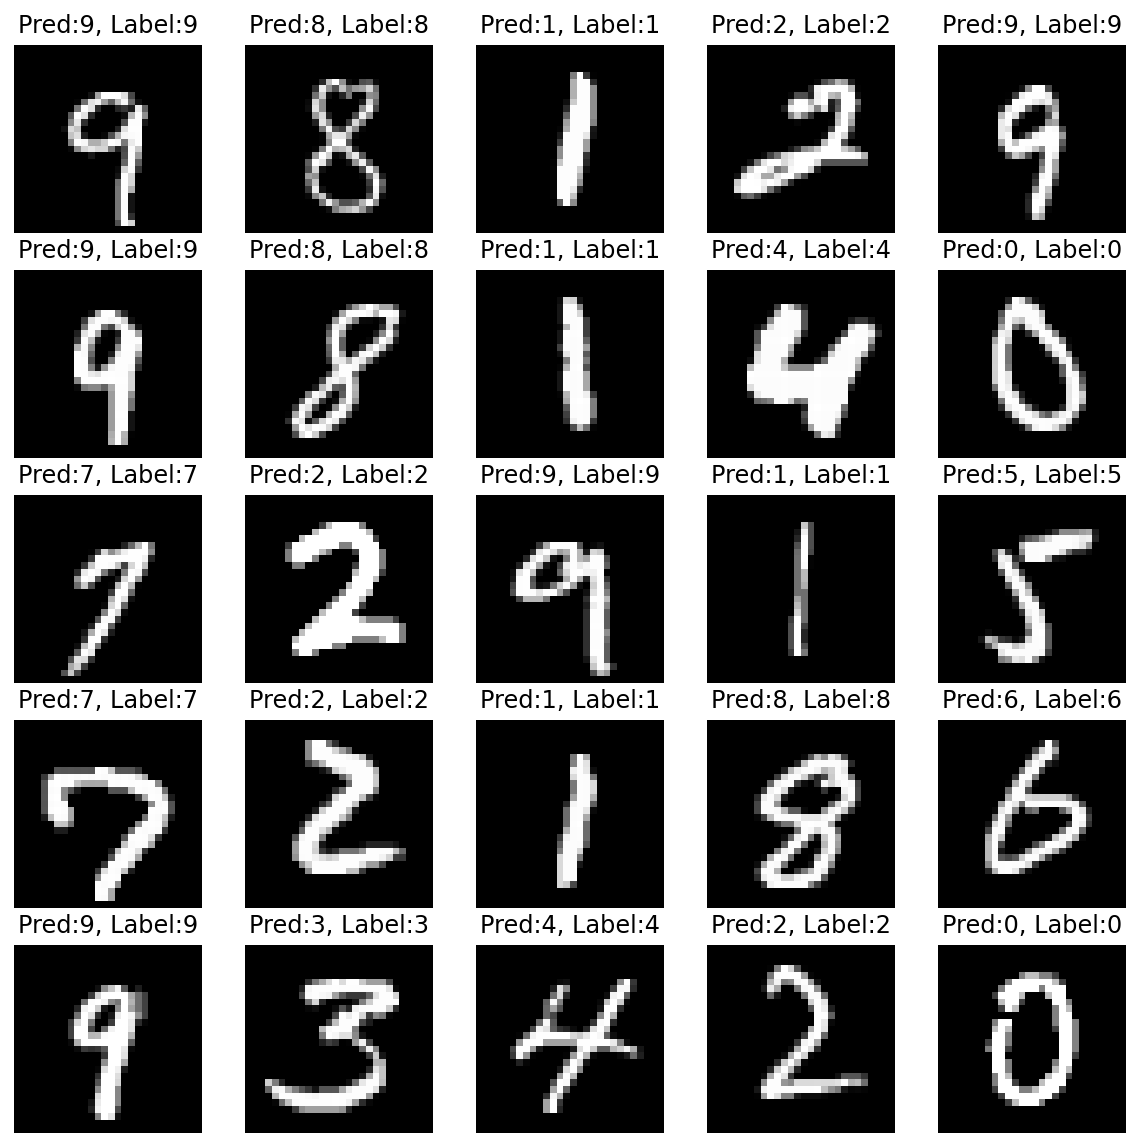

Done


In [ ]:
n_sample = 25
sample_indices = np.random.choice(len(mnist_test.targets), n_sample, replace=False)
test_x = mnist_test.data[sample_indices]
test_y = mnist_test.targets[sample_indices]
with torch.no_grad():
    y_pred = M.forward(test_x.view(-1, 28*28).type(torch.float).to(device)/255.)
y_pred = y_pred.argmax(axis=1)
plt.figure(figsize=(10,10))
for idx in range(n_sample):
    plt.subplot(5, 5, idx+1)
    plt.imshow(test_x[idx], cmap='gray')
    plt.axis('off')
    plt.title("Pred:%d, Label:%d"%(y_pred[idx],test_y[idx]))
plt.show()    
print ("Done")